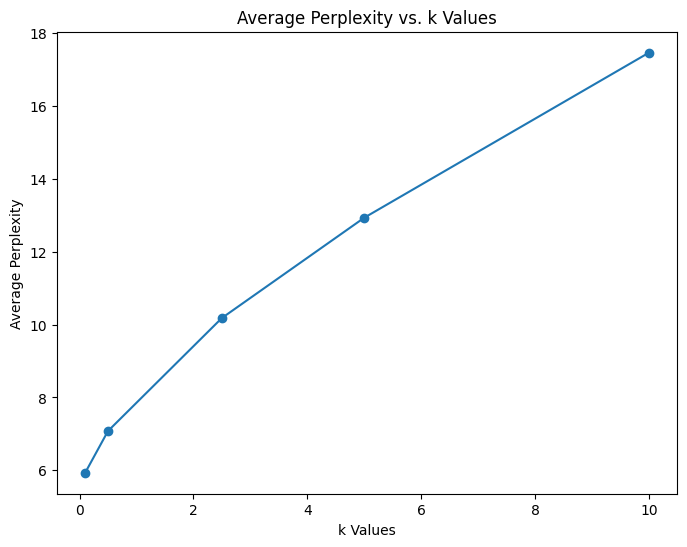

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np



k_values = [0.1,0.5,2.5,5,10]



average_perplexities = []
for k in k_values:
 total_perp = 0
 count_sent = 0


 for sentence in validation_set:
    count_sent += 1
    if len(sentence) < 4:
        continue
    else:
        n = len(sentence)
        log_perp = 0
        for i in range(3, n):
            n_gram = (sentence[i-3], sentence[i-2], sentence[i-1], sentence[i])

            trigram_count = trigrams.get(n_gram[:-1], 0)
            quadgram_count = quadgrams.get(n_gram, 0)
            vocabulary_size = len(unigrams)

            smooth_prob = (trigrams.get(n_gram[:-1],0) + k*len(unigrams))/(quadgrams.get(n_gram,0)+k)
            log_perp += math.log(smooth_prob)

        log_perp = (1/n) * log_perp

        total_perp += math.exp(log_perp)

 average_perplexity = total_perp / count_sent

 average_perplexities.append(average_perplexity)
plt.figure(figsize=(8, 6))
plt.plot(k_values, average_perplexities, marker='o', linestyle='-')
plt.title('Average Perplexity vs. k Values')
plt.xlabel('k Values')
plt.ylabel('Average Perplexity')

plt.show()


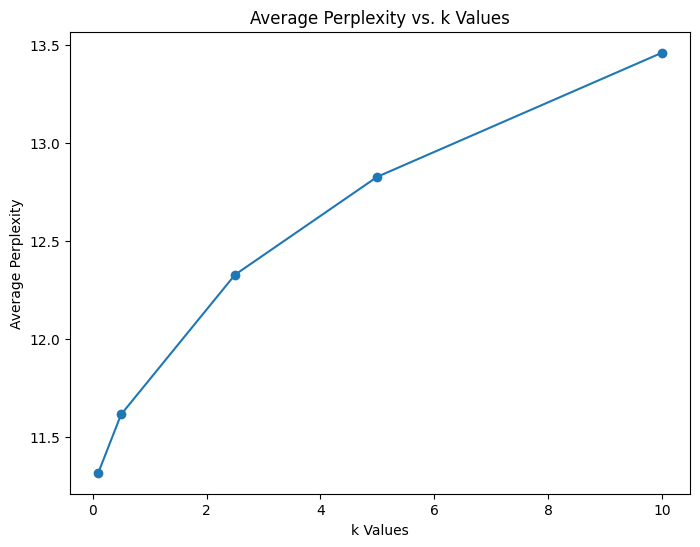

In [ ]:
import math
import matplotlib.pyplot as plt
k_values = [0.1, 0.5, 2.5, 5, 10]
average_perplexities = []
for k in k_values:
    total_perp = 0
    count_sent = 0

    for sentence in validation_set:
        count_sent += 1
        if len(sentence) < 2:
            continue
        else:
            perp = 1
            n = len(sentence)
            log_perp = 0
            for i in range(1, n):
                n_gram = (sentence[i - 1], sentence[i])

                smooth_prob = (unigrams.get(n_gram[0],0) + k*len(unigrams))/(bigrams.get(n_gram,0)+k)
                log_perp += math.log(smooth_prob)

            log_perp = (1 / n) * log_perp

            total_perp += math.exp(log_perp)

    average_perplexity = total_perp / count_sent

    average_perplexities.append(average_perplexity)
plt.figure(figsize=(8, 6))
plt.plot(k_values, average_perplexities, marker='o', linestyle='-')
plt.title('Average Perplexity vs. k Values')
plt.xlabel('k Values')
plt.ylabel('Average Perplexity')

plt.show()



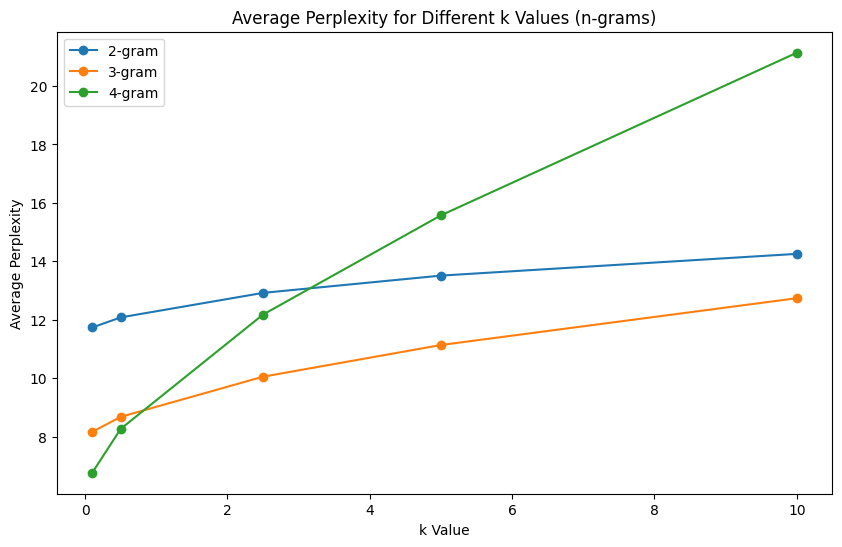

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
pentagrams={}
hexagrams={}
# Define the values of k and N
k_values = [0.1, 0.5, 2.5, 5, 10]
N_values = [2, 3, 4]  # N=2 for bigram, N=3 for trigram, N=4 for quadgram

# Initialize a dictionary to store average perplexities for each combination of k and N
average_perplexities = {N: [] for N in N_values}

# Loop over different values of N
for N in N_values:
    ngram_name = f"{N}-gram"

    # Initialize a list to store average perplexities for each k
    average_perplexities_ngram = []

    # Loop over different values of k
    for k in k_values:
        total_perp = 0
        count_sent = 0

        for sentence in validation_set:
            count_sent += 1
            if len(sentence) < N:
                continue
            else:
                n = len(sentence)
                log_perp = 0

                for i in range(N - 1, n):
                    n_gram = tuple(sentence[i - N + 1 : i + 1])

                    if N == 2:
                        n_gram_count = bigrams.get(n_gram, 0)
                        n_1_gram_count = unigrams.get(n_gram[0], 0)
                        vocabulary_size = len(unigrams)
                    elif N == 3:
                        n_gram_count = trigrams.get(n_gram, 0)
                        n_1_gram_count = bigrams.get(n_gram[:-1], 0)
                    elif N == 4:
                        n_gram_count = quadgrams.get(n_gram, 0)
                        n_1_gram_count = trigrams.get(n_gram[:-1], 0)

                    # Calculate smoothed probability
                    smooth_prob = ((n_1_gram_count + (k * vocabulary_size)) / ((n_gram_count )+k))
                    log_perp += math.log(smooth_prob)

                log_perp = (1 / (n - N + 1)) * log_perp
                total_perp += math.exp(log_perp)

        average_perplexity = total_perp / count_sent
        average_perplexities_ngram.append(average_perplexity)

    average_perplexities[ngram_name] = average_perplexities_ngram

# Plot average perplexities for different k values for each n-gram model
plt.figure(figsize=(10, 6))

for N in N_values:
    ngram_name = f"{N}-gram"
    plt.plot(k_values, average_perplexities[ngram_name], label=ngram_name, marker='o')

plt.xlabel('k Value')
plt.ylabel('Average Perplexity')
plt.title('Average Perplexity for Different k Values (n-grams)')
plt.legend()

plt.show()



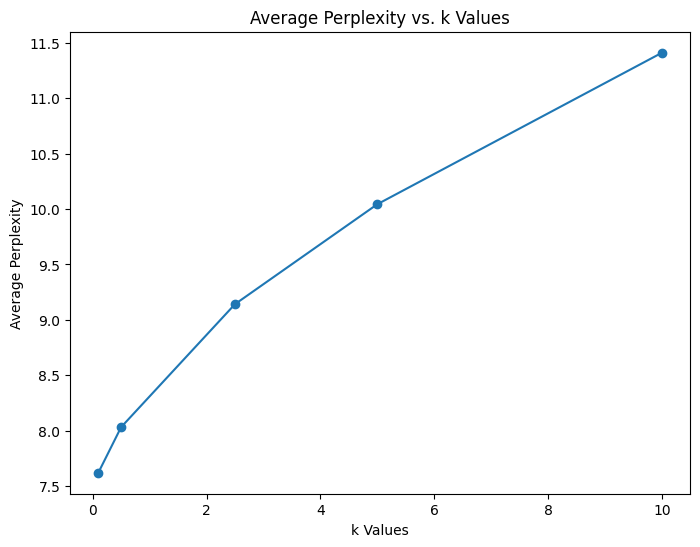

In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

k_values = [0.1, 0.5, 2.5, 5, 10]

average_perplexities = []

for k in k_values:
    total_perp = 0
    count_sent = 0

    for sentence in validation_set:
        count_sent += 1
        if len(sentence) < 3:
            continue
        else:
            n = len(sentence)
            log_perp = 0
            for i in range(2, n):
                n_gram = (sentence[i - 2], sentence[i - 1], sentence[i])  # Trigram

                trigram_count = trigrams.get(n_gram, 0)  # Count for the trigram
                bigram_count = bigrams.get(n_gram[:-1], 0)  # Count for the bigram
                vocabulary_size = len(unigrams)

                smooth_prob = (bigrams.get(n_gram[:-1],0) + k*len(unigrams))/(trigrams.get(n_gram,0)+k)
                log_perp += math.log(smooth_prob)

            log_perp = (1 / n) * log_perp

            total_perp += math.exp(log_perp)

    average_perplexity = total_perp / count_sent

    average_perplexities.append(average_perplexity)

plt.figure(figsize=(8, 6))
plt.plot(k_values, average_perplexities, marker='o', linestyle='-')
plt.title('Average Perplexity vs. k Values')
plt.xlabel('k Values')
plt.ylabel('Average Perplexity')

plt.show()


In [ ]:
## Bigram Laplace smoothing

total_perp = 0
count_sent = 0

for sentence in validation_set:
#     print(sentence)

    count_sent += 1
    if(len(sentence) < 2): continue
    else:
        perp = 1
        n = len(sentence)
        log_perp = 0
        for i in range(1 , n):
            n_gram = (sentence[i-1], sentence[i])

            smooth_prob = (unigrams.get(n_gram[0],0) + len(unigrams))/(bigrams.get(n_gram,0)+1)
            log_perp += math.log(smooth_prob)

        log_perp = (1/n)*log_perp

        total_perp += math.exp(log_perp)
avg_perp_bi=total_perp / count_sent


In [ ]:
total_perp = 0
count_sent = 0

for sentence in validation_set:

    count_sent += 1
    if(len(sentence) < 3): continue
    else:
        n = len(sentence)
        log_perp = 0
        for i in range(2 , n):
            n_gram = (sentence[i-2], sentence[i-1], sentence[i])

            smooth_prob = (bigrams.get(n_gram[:-1],0) + len(unigrams))/(trigrams.get(n_gram,0)+1)
            log_perp += math.log(smooth_prob)

        log_perp = (1/n)*log_perp

        total_perp += math.exp(log_perp)
avg_perp_tri=total_perp / count_sent

total_perp = 0
count_sent = 0

for sentence in validation_set:
#     print(sentence)

    count_sent += 1
    if(len(sentence) < 4): continue
    else:
        n = len(sentence)
        log_perp = 0
        for i in range(3 , n):
            n_gram = (sentence[i-3], sentence[i-2], sentence[i-1], sentence[i])

            smooth_prob = (trigrams.get(n_gram[:-1],0) + len(unigrams))/(quadgrams.get(n_gram,0)+1)
            log_perp += math.log(smooth_prob)

        log_perp = (1/n)*log_perp

        total_perp += math.exp(log_perp)
avg_perp_quad=total_perp / count_sent

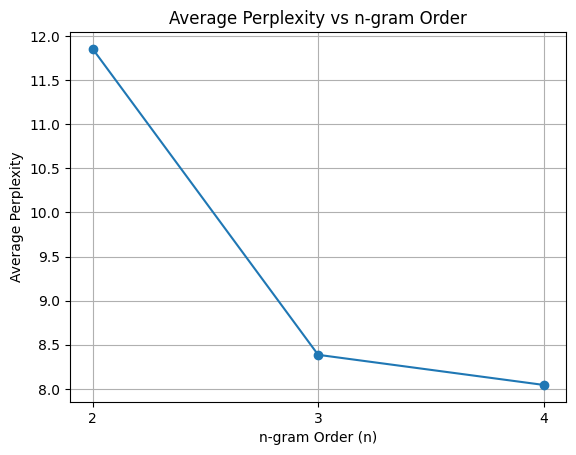

In [ ]:
import matplotlib.pyplot as plt



n_values = [2, 3, 4]
avg_perp_values = [avg_perp_bi, avg_perp_tri, avg_perp_quad]

plt.plot(n_values, avg_perp_values, marker='o', linestyle='-')
plt.title('Average Perplexity vs n-gram Order')
plt.xlabel('n-gram Order (n)')
plt.ylabel('Average Perplexity')
plt.grid(True)
plt.xticks(n_values)
plt.show()


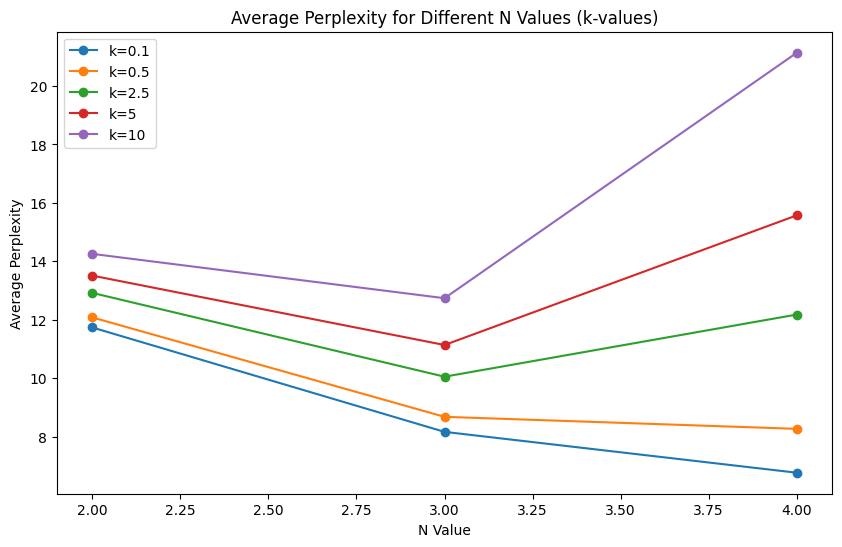

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Define the values of k and N
k_values = [0.1, 0.5, 2.5, 5, 10]
N_values = [2, 3, 4]  # N=2 for bigram, N=3 for trigram, N=4 for quadgram

# Initialize a dictionary to store average perplexities for each combination of k and N
average_perplexities = {k: [] for k in k_values}

# Loop over different values of k
for k in k_values:

    # Initialize a list to store average perplexities for each N
    average_perplexities_k = []

    # Loop over different values of N
    for N in N_values:
        total_perp = 0
        count_sent = 0

        for sentence in validation_set:
            count_sent += 1
            if len(sentence) < N:
                continue
            else:
                n = len(sentence)
                log_perp = 0

                for i in range(N - 1, n):
                    n_gram = tuple(sentence[i - N + 1 : i + 1])

                    if N == 2:
                        n_gram_count = bigrams.get(n_gram, 0)
                        n_1_gram_count = unigrams.get(n_gram[0], 0)
                        vocabulary_size = len(unigrams)
                    elif N == 3:
                        n_gram_count = trigrams.get(n_gram, 0)
                        n_1_gram_count = bigrams.get(n_gram[:-1], 0)
                    elif N == 4:
                        n_gram_count = quadgrams.get(n_gram, 0)
                        n_1_gram_count = trigrams.get(n_gram[:-1], 0)

                    # Calculate smoothed probability
                    smooth_prob = (n_1_gram_count+ (k * vocabulary_size)) / (n_gram_count +k )
                    log_perp += math.log(smooth_prob)

                log_perp = (1 / (n - N + 1)) * log_perp
                total_perp += math.exp(log_perp)

        average_perplexity = total_perp / count_sent
        average_perplexities_k.append(average_perplexity)

    average_perplexities[k] = average_perplexities_k

# Plot average perplexities for different N values for each k
plt.figure(figsize=(10, 6))

for k in k_values:
    plt.plot(N_values, average_perplexities[k], label=f'k={k}', marker='o')

plt.xlabel('N Value')
plt.ylabel('Average Perplexity')
plt.title('Average Perplexity for Different N Values (k-values)')
plt.legend()

plt.show()
